In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import causal_ccm as ccm

# Load data
with open('data_zscore.pkl', 'rb') as f:
    cloud,precipitation,pollution=pickle.load(f)


C:\Windows\Temp\ipykernel_21376\566389554.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


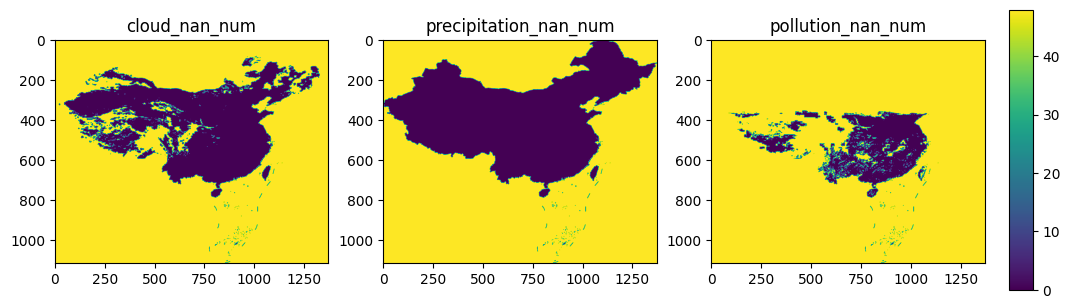

In [12]:
np.random.seed(0)
# Compute causality
a=np.sum(np.isnan(cloud),axis=0)
b=np.sum(np.isnan(precipitation),axis=0)
c=np.sum(np.isnan(pollution),axis=0)
nan_num=np.array([a,b,c])

plt.style.use('default')
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))
ax1.imshow(a)
ax1.set_title('cloud_nan_num')
ax2.imshow(b)
ax2.set_title('precipitation_nan_num')
ax3.imshow(c)
ax3.set_title('pollution_nan_num')
fig.colorbar(mappable=ax3.images[0],ax=ax3,cax=fig.add_axes([0.92,0.15,0.02,0.7]))
fig.show()


In [1]:
import geopandas as gpd
china=gpd.read_file('./china/china.shp',encoding='gbk')
bounds=china.bounds
up=bounds['maxy'].max()
down=bounds['miny'].min()
left=bounds['minx'].min()
right=bounds['maxx'].max()


In [3]:

china.to_file('./china/china.svg',encoding='gbk')

In [5]:
lats=[200,200,400,400,600,600]
lons=[1000,250,1000,500,1000,750]

i=1
lat=lats[i]
lon=lons[i]

real_lat=np.round(up-lat*(up-down)/cloud.shape[1],2)
real_lon=np.round(left+lon*(right-left)/cloud.shape[2],2)

nan_num[:,lat,lon] 
# Notice:the coordinate of the image is (lat,lon) not (lon,lat)

array([ 3,  0, 13])

In [6]:
import pandas as pd
X=pd.Series(cloud[:,lat,lon])
Y=pd.Series(precipitation[:,lat,lon])
Z=pd.Series(pollution[:,lat,lon])

if np.isnan(X[0]):
    X[0]=X.mean()
if np.isnan(X[47]):
    X[47]=X.mean()
X=X.interpolate()

if np.isnan(Y[0]):
    Y[0]=Y.mean()
if np.isnan(Y[47]):
    Y[47]=Y.mean()
Y=Y.interpolate()

if np.isnan(Z[0]):
    Z[0]=Z.mean()
if np.isnan(Z[47]):
    Z[47]=Z.mean()
Z=Z.interpolate()

C:\Windows\Temp\ipykernel_21376\2144056076.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


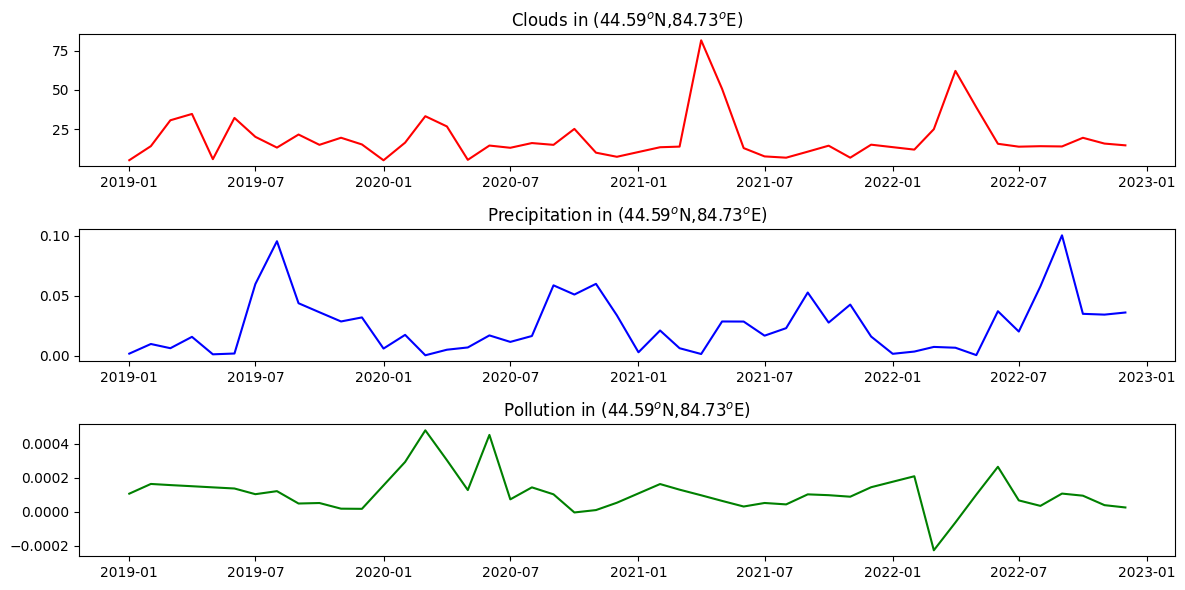

In [7]:
L=48
tau=1
E=2



import datetime
from dateutil.relativedelta import relativedelta

# 创建一个日期范围
dates = [datetime.datetime(2019, 1, 1) + relativedelta(months=i) for i in range(L)]
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(12,6))
ax1.plot(dates,X,'r')
ax1.set_title(f'Clouds in ({real_lat}$^o$N,{real_lon}$^o$E)')
ax2.plot(dates,Y,'b')
ax2.set_title(f'Precipitation in ({real_lat}$^o$N,{real_lon}$^o$E)')
ax3.plot(dates,Z,'g')
ax3.set_title(f'Pollution in ({real_lat}$^o$N,{real_lon}$^o$E)')

fig.tight_layout()
fig.show()
# fig.savefig(f'./ccm_results/data{i}.png',dpi=300)


X->Y r 0.34 p value 0.02
Y->X r 0.1 p value 0.52


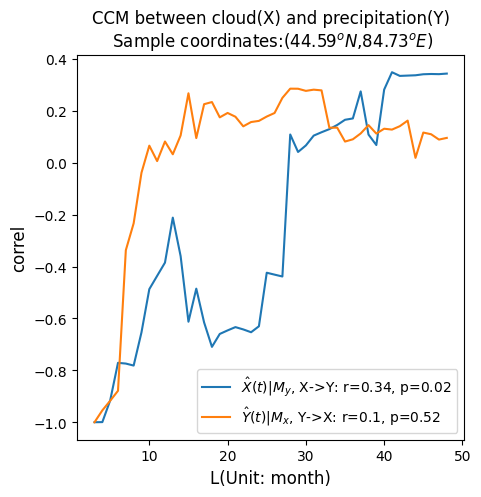

In [8]:
L_range=range(3,49)
Xhat_My,Yhat_Mx=[],[]
for L in L_range:
    ccm_XY=ccm.ccm(X,Y,tau,E,L)
    ccm_YX=ccm.ccm(Y,X,tau,E,L)
    Xhat_My.append(ccm_XY.causality()[0])
    Yhat_Mx.append(ccm_YX.causality()[0])

plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$, X->Y: r='+str(np.round(Xhat_My[-1], 2))+', p='+str(np.round(ccm_XY.causality()[1], 2)))
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$, Y->X: r='+str(np.round(Yhat_Mx[-1], 2))+', p='+str(np.round(ccm_YX.causality()[1], 2)))
plt.xlabel('L(Unit: month)', size=12)
plt.ylabel('correl', size=12)
plt.title(f'CCM between cloud(X) and precipitation(Y)\n Sample coordinates:({real_lat}$^oN$,{real_lon}$^oE$)', size=12)
plt.legend(prop={'size': 10})   
# plt.savefig(f'./ccm_results/ccm_cloud_precipitation_{i}.png', dpi=300)

print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 2))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 2))

X->Z r 0.07 p value 0.64
Z->X r 0.27 p value 0.07


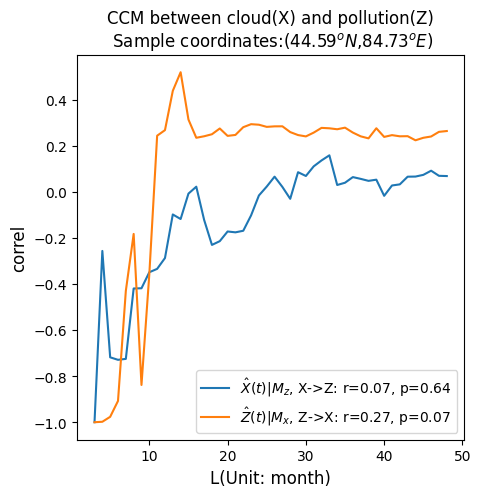

In [9]:
Xhat_Mz,Zhat_Mx=[],[]

for L in L_range:
    ccm_XZ=ccm.ccm(X,Z,tau,E,L)
    ccm_ZX=ccm.ccm(Z,X,tau,E,L)
    Xhat_Mz.append(ccm_XZ.causality()[0])
    Zhat_Mx.append(ccm_ZX.causality()[0])

plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_Mz, label='$\hat{X}(t)|M_z$, X->Z: r='+str(np.round(Xhat_Mz[-1], 2))+', p='+str(np.round(ccm_XZ.causality()[1], 2)))
plt.plot(L_range, Zhat_Mx, label='$\hat{Z}(t)|M_x$, Z->X: r='+str(np.round(Zhat_Mx[-1], 2))+', p='+str(np.round(ccm_ZX.causality()[1], 2)))
plt.xlabel('L(Unit: month)', size=12)
plt.ylabel('correl', size=12)
plt.title(f'CCM between cloud(X) and pollution(Z)\n Sample coordinates:({real_lat}$^oN$,{real_lon}$^oE$)', size=12)
plt.legend(prop={'size': 10})
# plt.savefig(f'./ccm_results/ccm_cloud_pollution_{i}.png', dpi=300)

print('X->Z r', np.round(Xhat_Mz[-1], 2), 'p value', np.round(ccm_XZ.causality()[1], 2))
print('Z->X r', np.round(Zhat_Mx[-1], 2), 'p value', np.round(ccm_ZX.causality()[1], 2))



Y->Z r 0.27 p value 0.07
Z->Y r 0.34 p value 0.02


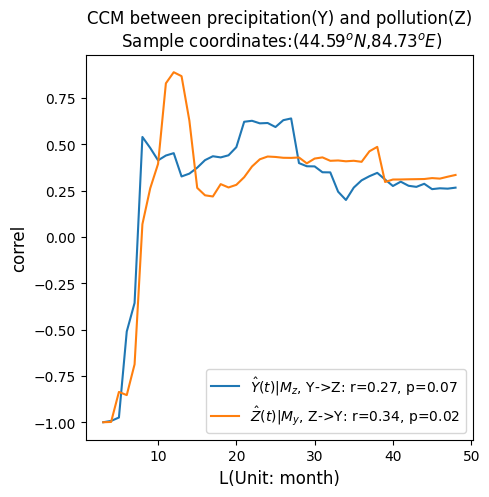

In [10]:
Yhat_Mz,Zhat_My=[],[]

for L in L_range:
    ccm_YZ=ccm.ccm(Y,Z,tau,E,L)
    ccm_ZY=ccm.ccm(Z,Y,tau,E,L)
    Yhat_Mz.append(ccm_YZ.causality()[0])
    Zhat_My.append(ccm_ZY.causality()[0])

plt.figure(figsize=(5,5))
plt.plot(L_range, Yhat_Mz, label='$\hat{Y}(t)|M_z$, Y->Z: r='+str(np.round(Yhat_Mz[-1], 2))+', p='+str(np.round(ccm_YZ.causality()[1], 2)))
plt.plot(L_range, Zhat_My, label='$\hat{Z}(t)|M_y$, Z->Y: r='+str(np.round(Zhat_My[-1], 2))+', p='+str(np.round(ccm_ZY.causality()[1], 2)))
plt.xlabel('L(Unit: month)', size=12)
plt.ylabel('correl', size=12)
plt.title(f'CCM between precipitation(Y) and pollution(Z)\n Sample coordinates:({real_lat}$^oN$,{real_lon}$^oE$)', size=12)
plt.legend(prop={'size': 10})
# plt.savefig(f'./ccm_results/ccm_precipitation_pollution_{i}.png', dpi=300)

print('Y->Z r', np.round(Yhat_Mz[-1], 2), 'p value', np.round(ccm_YZ.causality()[1], 2))
print('Z->Y r', np.round(Zhat_My[-1], 2), 'p value', np.round(ccm_ZY.causality()[1], 2))
